In [2]:
import pandas as pd

# Assuming penguin_size.csv is in the current working directory
file_path = "penguins_size.csv"

# Read the CSV file into a pandas DataFrame, considering 'NA' as missing values
df = pd.read_csv(file_path, na_values='NA')

# Drop rows with missing values
df_cleaned = df.dropna()

# Create a profile table
profile_table = pd.DataFrame()

# Number of islands per species
profile_table['num_of_islands'] = df_cleaned.groupby('species')['island'].nunique()

# Most common sex per species
profile_table['most_common_sex'] = df_cleaned.groupby('species')['sex'].agg(lambda x: x.mode().iloc[0])

# Average culmen length per species
profile_table['avg_culmen_length'] = df_cleaned.groupby('species')['culmen_length_mm'].mean()

# Average culmen depth per species
profile_table['avg_culmen_depth'] = df_cleaned.groupby('species')['culmen_depth_mm'].mean()

# Average flipper length per species
profile_table['avg_flipper_length'] = df_cleaned.groupby('species')['flipper_length_mm'].mean()

# Average body mass per species
profile_table['avg_body_mass'] = df_cleaned.groupby('species')['body_mass_g'].mean()

# Display the profile table
print(profile_table)


           num_of_islands most_common_sex  avg_culmen_length  \
species                                                        
Adelie                  3          FEMALE          38.823973   
Chinstrap               1          FEMALE          48.833824   
Gentoo                  1            MALE          47.542500   

           avg_culmen_depth  avg_flipper_length  avg_body_mass  
species                                                         
Adelie            18.347260          190.102740    3706.164384  
Chinstrap         18.420588          195.823529    3733.088235  
Gentoo            15.002500          217.233333    5090.625000  


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load and clean the data
file_path = "penguins_size.csv"
df = pd.read_csv(file_path, na_values='NA').dropna()

# Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['species'] = le.fit_transform(df['species'])

# Define features (X) and target variable (y)
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

      Adelie       0.77      0.87      0.82        31
   Chinstrap       0.67      0.46      0.55        13
      Gentoo       0.91      0.91      0.91        23

    accuracy                           0.81        67
   macro avg       0.78      0.75      0.76        67
weighted avg       0.80      0.81      0.80        67



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load and clean the data
file_path = "penguins_size.csv"
df = pd.read_csv(file_path, na_values='NA').dropna()

# Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['species'] = le.fit_transform(df['species'])

# Define features (X) and target variable (y)
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Create a DataFrame to display the random dimensions alongside their results
results_df = pd.DataFrame({'Culmen Length': X_test['culmen_length_mm'],
                            'Culmen Depth': X_test['culmen_depth_mm'],
                            'Flipper Length': X_test['flipper_length_mm'],
                            'Body Mass': X_test['body_mass_g'],
                            'Sex': le.inverse_transform(X_test['sex']),
                            'Actual Species': le.inverse_transform(y_test),
                            'Predicted Species': le.inverse_transform(y_pred)})

# Display the results DataFrame
print(results_df)


     Culmen Length  Culmen Depth  Flipper Length  Body Mass        Sex  \
30            39.5          16.7           178.0     3250.0  Chinstrap   
317           46.9          14.6           222.0     4875.0  Chinstrap   
79            42.1          19.1           195.0     4000.0     Gentoo   
201           49.8          17.3           198.0     3675.0  Chinstrap   
63            41.1          18.2           192.0     4050.0     Gentoo   
..             ...           ...             ...        ...        ...   
288           43.5          14.2           220.0     4700.0  Chinstrap   
4             36.7          19.3           193.0     3450.0  Chinstrap   
83            35.1          19.4           193.0     4200.0     Gentoo   
319           51.1          16.5           225.0     5250.0     Gentoo   
66            35.5          16.2           195.0     3350.0  Chinstrap   

    Actual Species Predicted Species  
30          Adelie         Chinstrap  
317         Gentoo            Gen

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie'], dtype=object)

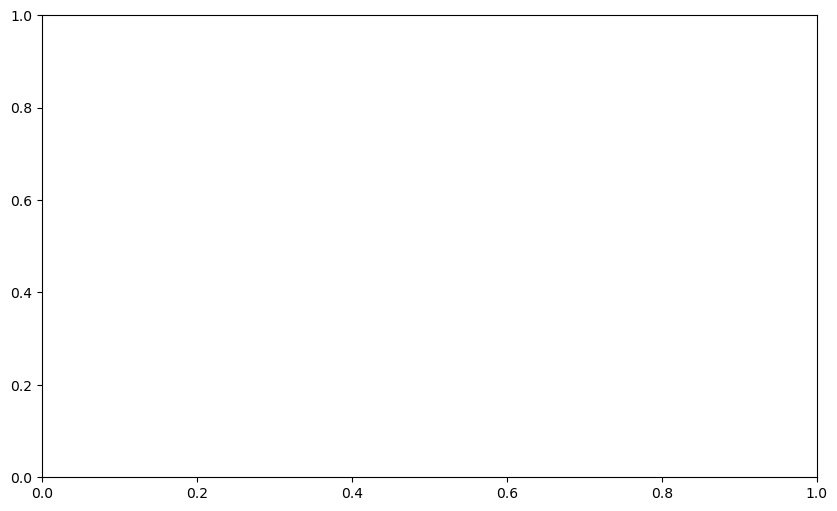

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load and clean the data
file_path = "penguins_size.csv"
df = pd.read_csv(file_path, na_values='NA').dropna()

# Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['species'] = le.fit_transform(df['species'])

# Define features (X) and target variable (y)
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Inverse transform species labels for plotting
actual_species = le.inverse_transform(y_test)
predicted_species = le.inverse_transform(y_pred)

# Create a scatter plot for actual species
plt.figure(figsize=(10, 6))
scatter_actual = plt.scatter(X_test['culmen_length_mm'], X_test['culmen_depth_mm'], c=actual_species, marker='o', label='Actual Species')

# Create a scatter plot for predicted species
scatter_predicted = plt.scatter(X_test['culmen_length_mm'], X_test['culmen_depth_mm'], c=predicted_species, marker='x', label='Predicted Species')

# Set labels and legend
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Penguin Species Prediction')
plt.legend()

# Show the plot
plt.show()
